In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  ##

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from warnings import filterwarnings
filterwarnings("ignore")

##  Analysing Dataset


In [2]:
df = pd.read_csv('final.csv',sep=',',encoding="utf-8")
df.head()

,heart_rate,oxygen_rate,blood_pressure,target
0,105,95,117,Normal
1,94,92,115,Normal
2,114,94,129,Normal
3,113,92,77,Normal
4,73,95,109,Normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   heart_rate      800 non-null    int64 
 1   oxygen_rate     800 non-null    int64 
 2   blood_pressure  800 non-null    int64 
 3   target          800 non-null    object
dtypes: int64(3), object(1)
memory usage: 25.1+ KB


In [4]:
df

,heart_rate,oxygen_rate,blood_pressure,target
0,105,95,117,Normal
1,94,92,115,Normal
2,114,94,129,Normal
3,113,92,77,Normal
4,73,95,109,Normal
...,...,...,...,...
795,52,90,51,Fright
796,48,61,69,Fright
797,45,73,56,Fright
798,49,85,51,Fright


In [5]:
df.shape

(800, 4)

In [6]:
df.isna().sum()

heart_rate        0
oxygen_rate       0
blood_pressure    0
target            0
dtype: int64

In [7]:
df.apply(lambda x:len(x.unique()))


heart_rate        121
oxygen_rate        46
blood_pressure    121
target              3
dtype: int64

In [8]:
print('oxygen_rate ',df['oxygen_rate'].unique())
print('heart_rate ',df['heart_rate'].unique())
print('blood_pressure ',df['blood_pressure'].unique())
print('target ',df['target'].unique())


oxygen_rate  [ 95  92  94  91  90  93  97 100 104 103 101  96 105  98 102  99  82  76
  72  78  61  60  85  89  88  71  84  66  75  62  87  64  65  80  83  70
  81  74  79  73  86  69  68  77  63  67]
heart_rate  [105  94 114 113  73  93  99  82  84 109  86 103 101 111 108  80  91 100
  77  95  90  74  81  70 120 110  97  78 106  92 112  88 119  72 104 115
 102  76  96 116  98 117 118  87  75  89  83 107  71  79  85 121 157 133
 149 129 145 134 136 159 126 125 131 150 132 144 137 128 124 156 151 155
 146 158 153 127 139 140 130  66  64  40  60  42  69  62  52  67  44  53
  45  47  51  58  55  59  46  49  61  68  48  63  41  57  54 143 123 142
 141 152 148 138 147 160 122  43  56  65  50 154 135]
blood_pressure  [117 115 129  77 109  88  76 105 110 124  93 106  82 100  80 125 128 121
 104 122  99 113  72 102 127 111 107 130  85 108  74 112  97 120 103  90
 114  70  71 126  78 101  81  79  94  75  86  98 119 145 132 169 144 166
 147 153 143 141 134 168 163 137 161 140 154 155 157 165 138

In [9]:
df.columns

Index(['heart_rate', 'oxygen_rate', 'blood_pressure', 'target'], dtype='object')

(array([ 87.,  73.,  86.,  87., 106.,  84.,  92.,  58.,  59.,  68.]),
 array([ 40.,  52.,  64.,  76.,  88., 100., 112., 124., 136., 148., 160.]),
 <BarContainer object of 10 artists>)

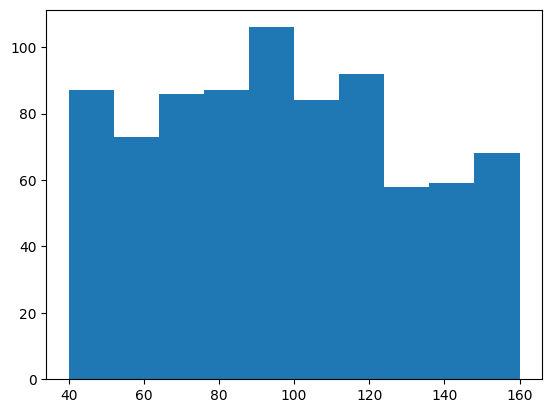

In [10]:
plt.hist(df['heart_rate'], bins=None, range=None, density=False)

(array([ 27.,  22.,  40.,  23.,  31.,  26., 160., 272.,  99., 100.]),
 array([ 60. ,  64.5,  69. ,  73.5,  78. ,  82.5,  87. ,  91.5,  96. ,
        100.5, 105. ]),
 <BarContainer object of 10 artists>)

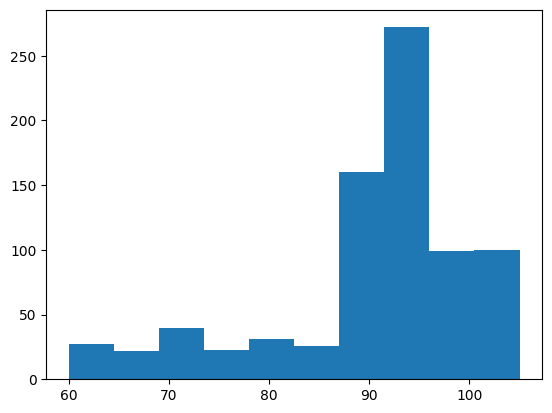

In [11]:
plt.hist(df['oxygen_rate'], bins=None, range=None, density=False)

In [12]:
df.columns

Index(['heart_rate', 'oxygen_rate', 'blood_pressure', 'target'], dtype='object')

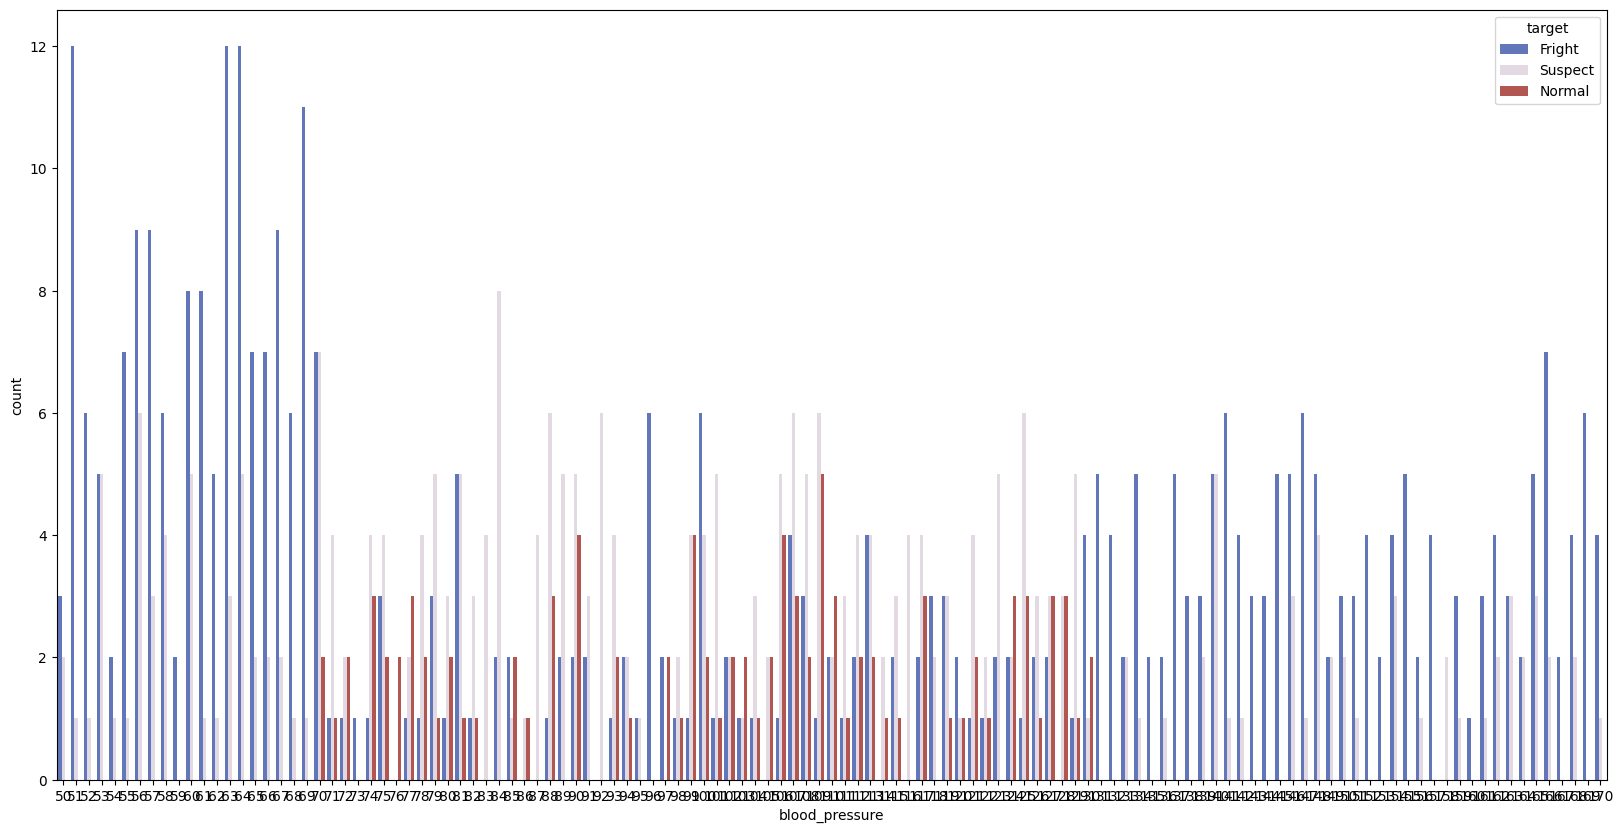

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['blood_pressure'],data=df,hue='target',palette="twilight_shifted",saturation=2,dodge=True,)

plt.savefig("Target&temp.png")

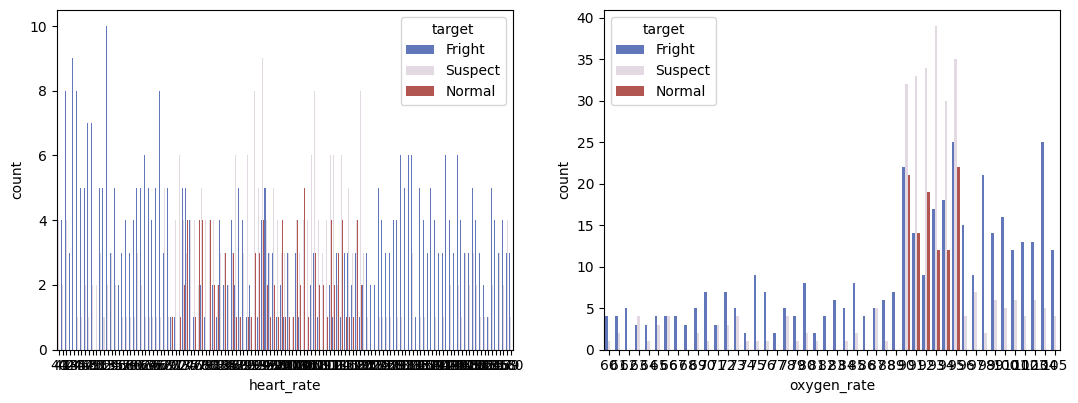

In [14]:
list = ['heart_rate', 'oxygen_rate']
m=1
plt.figure(figsize=(20,15))
for i in list:
    plt.subplot(3,3,m)
    sns.countplot(x=i,data=df,hue='target',palette="twilight_shifted",
    saturation=2,dodge=True)
    m+=1
    
plt.savefig("TargetRelation.png")

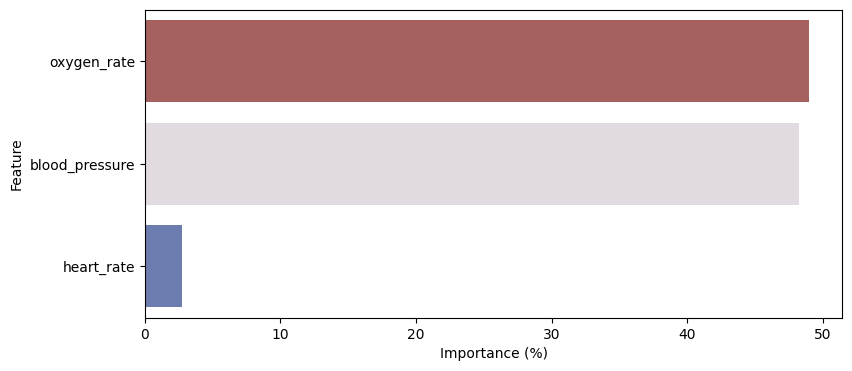

In [15]:
X = df.drop('target',axis=1)
Y = df['target']
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, Y)
per = []
for i in fs.scores_:
    per.append(round(((i/sum(fs.scores_))*100),3))

features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)

plt.figure(figsize=(9,4))
sns.barplot( x='Importance (%)',y='Feature',orient='h',data=features_data,palette='twilight_shifted_r')
insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()
features_data = features_data.set_index('Feature')
features_data
plt.savefig("FeatureImportance.png")

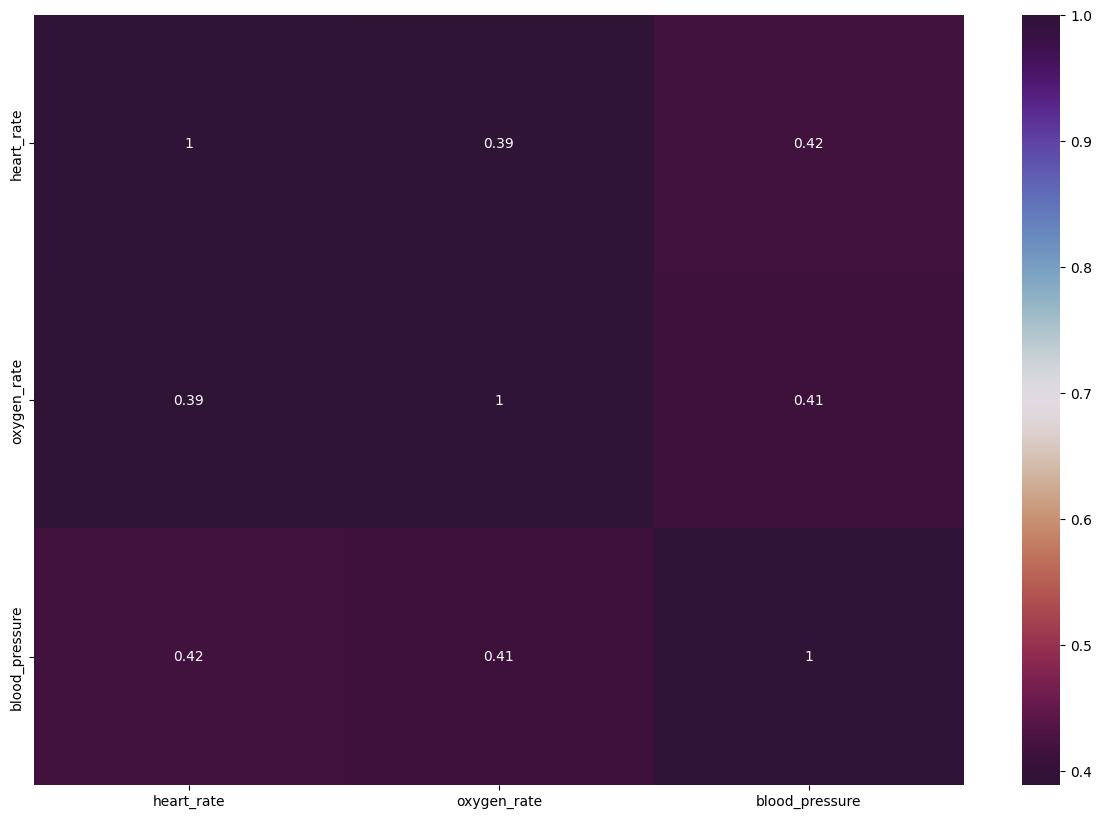

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),cbar = True, annot =True,cmap='twilight_shifted_r');
plt.savefig("heatmap.png")

In [17]:
df.columns


Index(['heart_rate', 'oxygen_rate', 'blood_pressure', 'target'], dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   heart_rate      800 non-null    int64 
 1   oxygen_rate     800 non-null    int64 
 2   blood_pressure  800 non-null    int64 
 3   target          800 non-null    object
dtypes: int64(3), object(1)
memory usage: 25.1+ KB


In [19]:
df.describe()

,heart_rate,oxygen_rate,blood_pressure
count,800.000000,800.000000,800.000000
mean,96.447500,90.323750,102.795000
std,33.251494,10.327258,34.781355
min,40.000000,60.000000,50.000000
25%,69.750000,90.000000,70.000000
50%,95.000000,93.000000,101.000000
75%,120.000000,95.000000,130.000000
max,160.000000,105.000000,170.000000


___________________________________

# Modelling
___________________________

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split


In [21]:
X = df.drop('target',axis=1).values
Y = df['target'].values

In [22]:
df

,heart_rate,oxygen_rate,blood_pressure,target
0,105,95,117,Normal
1,94,92,115,Normal
2,114,94,129,Normal
3,113,92,77,Normal
4,73,95,109,Normal
...,...,...,...,...
795,52,90,51,Fright
796,48,61,69,Fright
797,45,73,56,Fright
798,49,85,51,Fright


In [23]:
X.shape

(800, 3)

In [24]:
Y.shape

(800,)

In [25]:
# Split the dataset into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(640, 3)
(160, 3)
(640,)
(160,)


In [27]:
df.head()

,heart_rate,oxygen_rate,blood_pressure,target
0,105,95,117,Normal
1,94,92,115,Normal
2,114,94,129,Normal
3,113,92,77,Normal
4,73,95,109,Normal


In [28]:
df.tail()


,heart_rate,oxygen_rate,blood_pressure,target
795,52,90,51,Fright
796,48,61,69,Fright
797,45,73,56,Fright
798,49,85,51,Fright
799,52,88,61,Fright


# LogisticRegression

Logistic Regression Accuracy: 47.5 %


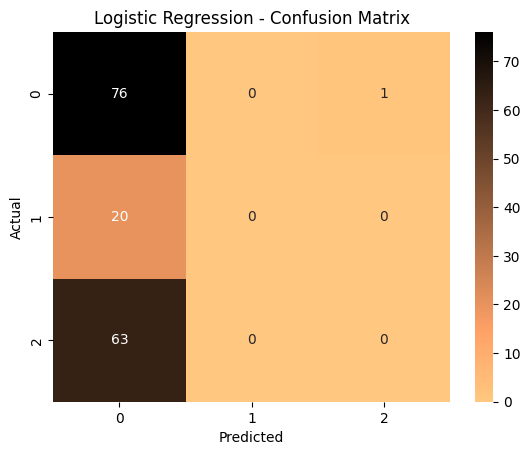

              precision    recall  f1-score   support

      Fright       0.48      0.99      0.64        77
      Normal       0.00      0.00      0.00        20
     Suspect       0.00      0.00      0.00        63

    accuracy                           0.48       160
   macro avg       0.16      0.33      0.21       160
weighted avg       0.23      0.47      0.31       160



In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression
lr_model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=31)
lr_model.fit(X_train, Y_train)
Y_pred_lr = lr_model.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr, Y_test) * 100, 4)
print(f"Logistic Regression Accuracy: {score_lr} %")

# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_pred_lr)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='copper_r', xticklabels=["0", "1","2"], yticklabels=["0", "1","2"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(Y_test, Y_pred_lr))


# RandomForestClassifier

Random Forest Accuracy: 95.625 %


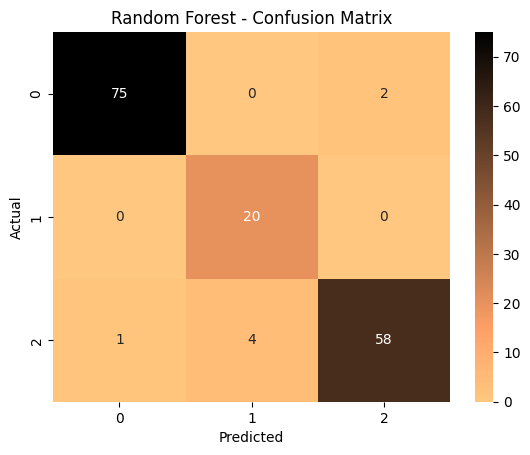

              precision    recall  f1-score   support

      Fright       0.99      0.97      0.98        77
      Normal       0.83      1.00      0.91        20
     Suspect       0.97      0.92      0.94        63

    accuracy                           0.96       160
   macro avg       0.93      0.96      0.94       160
weighted avg       0.96      0.96      0.96       160



In [30]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=31)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)
score_rf = round(accuracy_score(Y_pred_rf, Y_test) * 100, 4)
print(f"Random Forest Accuracy: {score_rf} %")

# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_pred_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='copper_r', xticklabels=["0", "1","2"], yticklabels=["0", "1","2"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(Y_test, Y_pred_rf))

import pickle
with open('new3.pkl', 'wb') as file:
   pickle.dump(rf_model,file)


# GradientBoostingClassifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=31)
gb_model.fit(X_train, Y_train)
Y_pred_gb = gb_model.predict(X_test)
score_gb = round(accuracy_score(Y_pred_gb, Y_test) * 100, 4)
print(f"Gradient Boosting Accuracy: {score_gb} %")
print(classification_report(Y_test, Y_pred_gb))


Gradient Boosting Accuracy: 96.25 %
              precision    recall  f1-score   support

      Fright       0.99      0.96      0.97        77
      Normal       0.91      1.00      0.95        20
     Suspect       0.95      0.95      0.95        63

    accuracy                           0.96       160
   macro avg       0.95      0.97      0.96       160
weighted avg       0.96      0.96      0.96       160



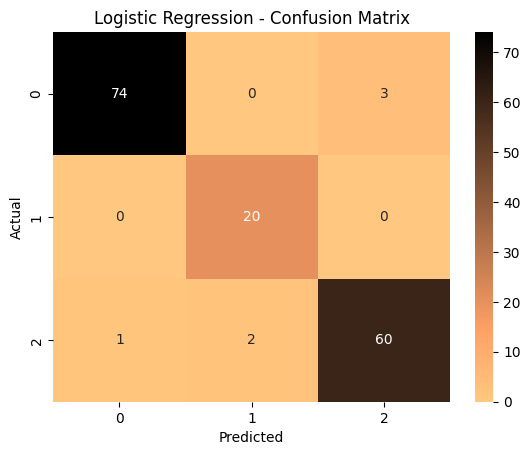

In [32]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_pred_gb)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='copper_r', xticklabels=["0", "1","2"], yticklabels=["0", "1","2"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# AdaBoostClassifier

In [33]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost
ab_model = AdaBoostClassifier(random_state=31)
ab_model.fit(X_train, Y_train)
Y_pred_ab = ab_model.predict(X_test)
score_ab = round(accuracy_score(Y_pred_ab, Y_test) * 100, 4)
print(f"AdaBoost Accuracy: {score_ab} %")
print(classification_report(Y_test, Y_pred_ab))


AdaBoost Accuracy: 69.375 %
              precision    recall  f1-score   support

      Fright       1.00      0.47      0.64        77
      Normal       0.71      1.00      0.83        20
     Suspect       0.57      0.87      0.69        63

    accuracy                           0.69       160
   macro avg       0.76      0.78      0.72       160
weighted avg       0.80      0.69      0.68       160



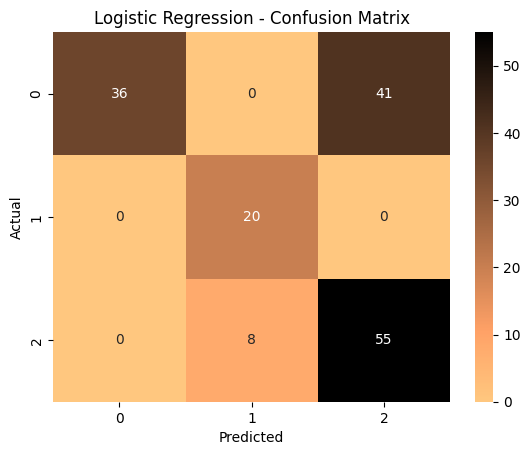

In [34]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_pred_ab)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='copper_r', xticklabels=["0", "1","2"], yticklabels=["0", "1","2"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# xgboost

In [35]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode target labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=31)
xgb_model.fit(X_train, Y_train_encoded)
Y_pred_xgb = xgb_model.predict(X_test)
score_xgb = round(accuracy_score(Y_test_encoded, Y_pred_xgb) * 100, 4)

print(f"XGBoost Accuracy: {score_xgb} %")
print(classification_report(Y_test_encoded, Y_pred_xgb, target_names=label_encoder.classes_))


XGBoost Accuracy: 96.25 %
              precision    recall  f1-score   support

      Fright       0.99      0.96      0.97        77
      Normal       0.91      1.00      0.95        20
     Suspect       0.95      0.95      0.95        63

    accuracy                           0.96       160
   macro avg       0.95      0.97      0.96       160
weighted avg       0.96      0.96      0.96       160



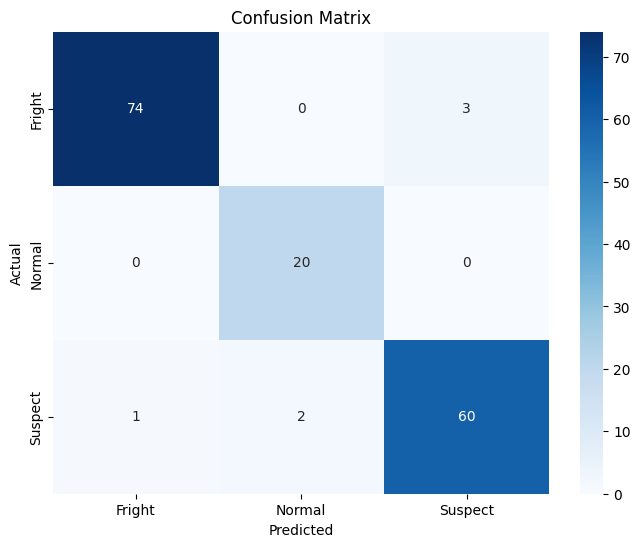

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(Y_test_encoded, Y_pred_xgb)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# CatBoostClassifier

In [37]:
from catboost import CatBoostClassifier

# CatBoost
cb_model = CatBoostClassifier(verbose=0, random_state=31)
cb_model.fit(X_train, Y_train)
Y_pred_cb = cb_model.predict(X_test)
score_cb = round(accuracy_score(Y_pred_cb, Y_test) * 100, 4)
print(f"CatBoost Accuracy: {score_cb} %")
print(classification_report(Y_test, Y_pred_cb))


CatBoost Accuracy: 96.875 %
              precision    recall  f1-score   support

      Fright       0.99      0.97      0.98        77
      Normal       0.91      1.00      0.95        20
     Suspect       0.97      0.95      0.96        63

    accuracy                           0.97       160
   macro avg       0.95      0.98      0.96       160
weighted avg       0.97      0.97      0.97       160



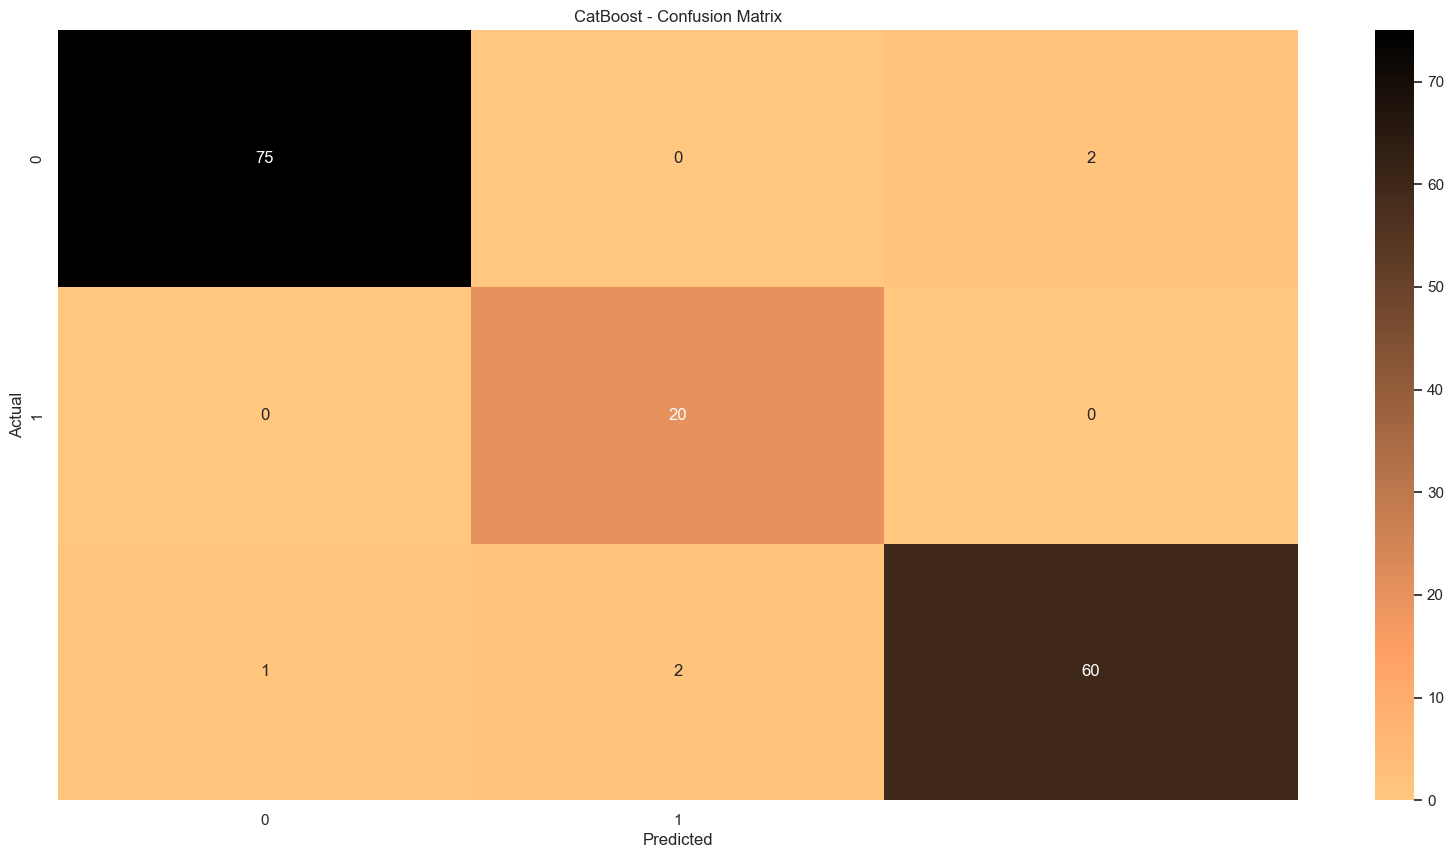

In [83]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_pred_cb)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='copper_r', xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("CatBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [39]:
import pickle
pickle.dump(cb_model,open("new.pkl","wb"))

# Naive_bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
Y_pred_nb = nb_model.predict(X_test)
score_nb = round(accuracy_score(Y_pred_nb, Y_test) * 100, 4)
print(f"Naive Bayes Accuracy: {score_nb} %")
print(classification_report(Y_test, Y_pred_nb))


Naive Bayes Accuracy: 70.625 %
              precision    recall  f1-score   support

      Fright       0.69      0.88      0.77        77
      Normal       0.74      1.00      0.85        20
     Suspect       0.74      0.40      0.52        63

    accuracy                           0.71       160
   macro avg       0.72      0.76      0.71       160
weighted avg       0.71      0.71      0.68       160



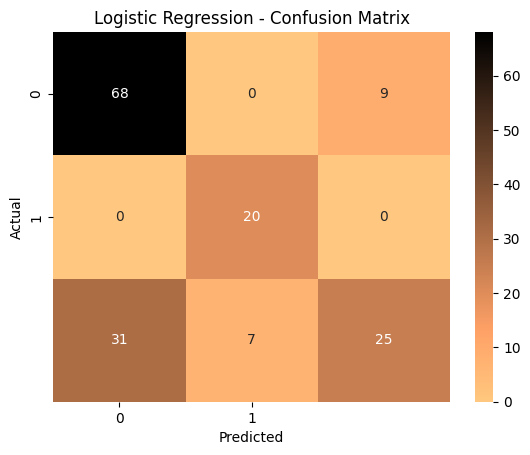

In [41]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_pred_nb)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='copper_r', xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# SUPPORT VECTOR MACHINE

In [42]:
from sklearn.svm import SVC

# SVM
svm_model = SVC(kernel='linear', probability=True, random_state=31)
svm_model.fit(X_train, Y_train)
Y_pred_svm = svm_model.predict(X_test)
score_svm = round(accuracy_score(Y_pred_svm, Y_test) * 100, 4)
print(f"SVM Accuracy: {score_svm} %")
print(classification_report(Y_test, Y_pred_svm))


SVM Accuracy: 48.125 %
              precision    recall  f1-score   support

      Fright       0.48      1.00      0.65        77
      Normal       0.00      0.00      0.00        20
     Suspect       0.00      0.00      0.00        63

    accuracy                           0.48       160
   macro avg       0.16      0.33      0.22       160
weighted avg       0.23      0.48      0.31       160



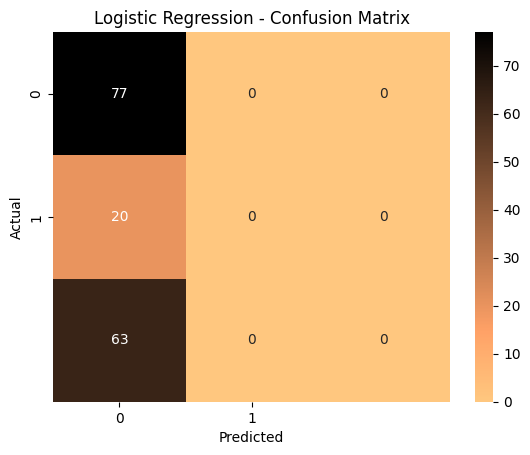

In [43]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_pred_svm)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='copper_r', xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# KNeighborsClassifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)
Y_pred_knn = knn_model.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn, Y_test) * 100, 4)
print(f"KNN Accuracy: {score_knn} %")
print(classification_report(Y_test, Y_pred_knn))


KNN Accuracy: 81.875 %
              precision    recall  f1-score   support

      Fright       0.89      0.91      0.90        77
      Normal       0.61      0.95      0.75        20
     Suspect       0.84      0.67      0.74        63

    accuracy                           0.82       160
   macro avg       0.78      0.84      0.80       160
weighted avg       0.83      0.82      0.82       160



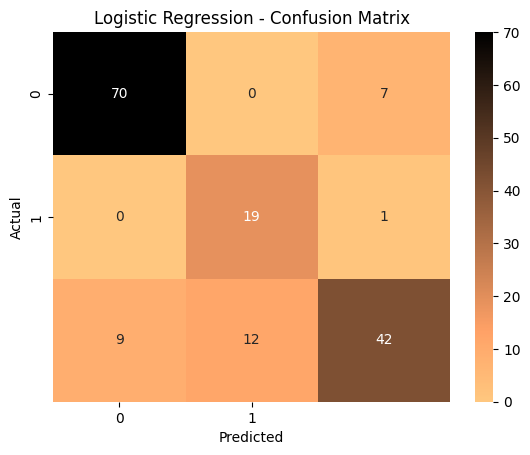

In [45]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_pred_knn)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='copper_r', xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# COMPARISION

The accuracy score achieved using Logistic Regression is: 47.5 %
The accuracy score achieved using Gradient Boosting is: 96.25 %
The accuracy score achieved using AdaBoost is: 69.375 %
The accuracy score achieved using XGBoost is: 96.25 %
The accuracy score achieved using CatBoost is: 96.875 %
The accuracy score achieved using Naive Bayes is: 70.625 %
The accuracy score achieved using SVM is: 48.125 %
The accuracy score achieved using KNN is: 81.875 %
The accuracy score achieved using Random Forest is: 95.625 %


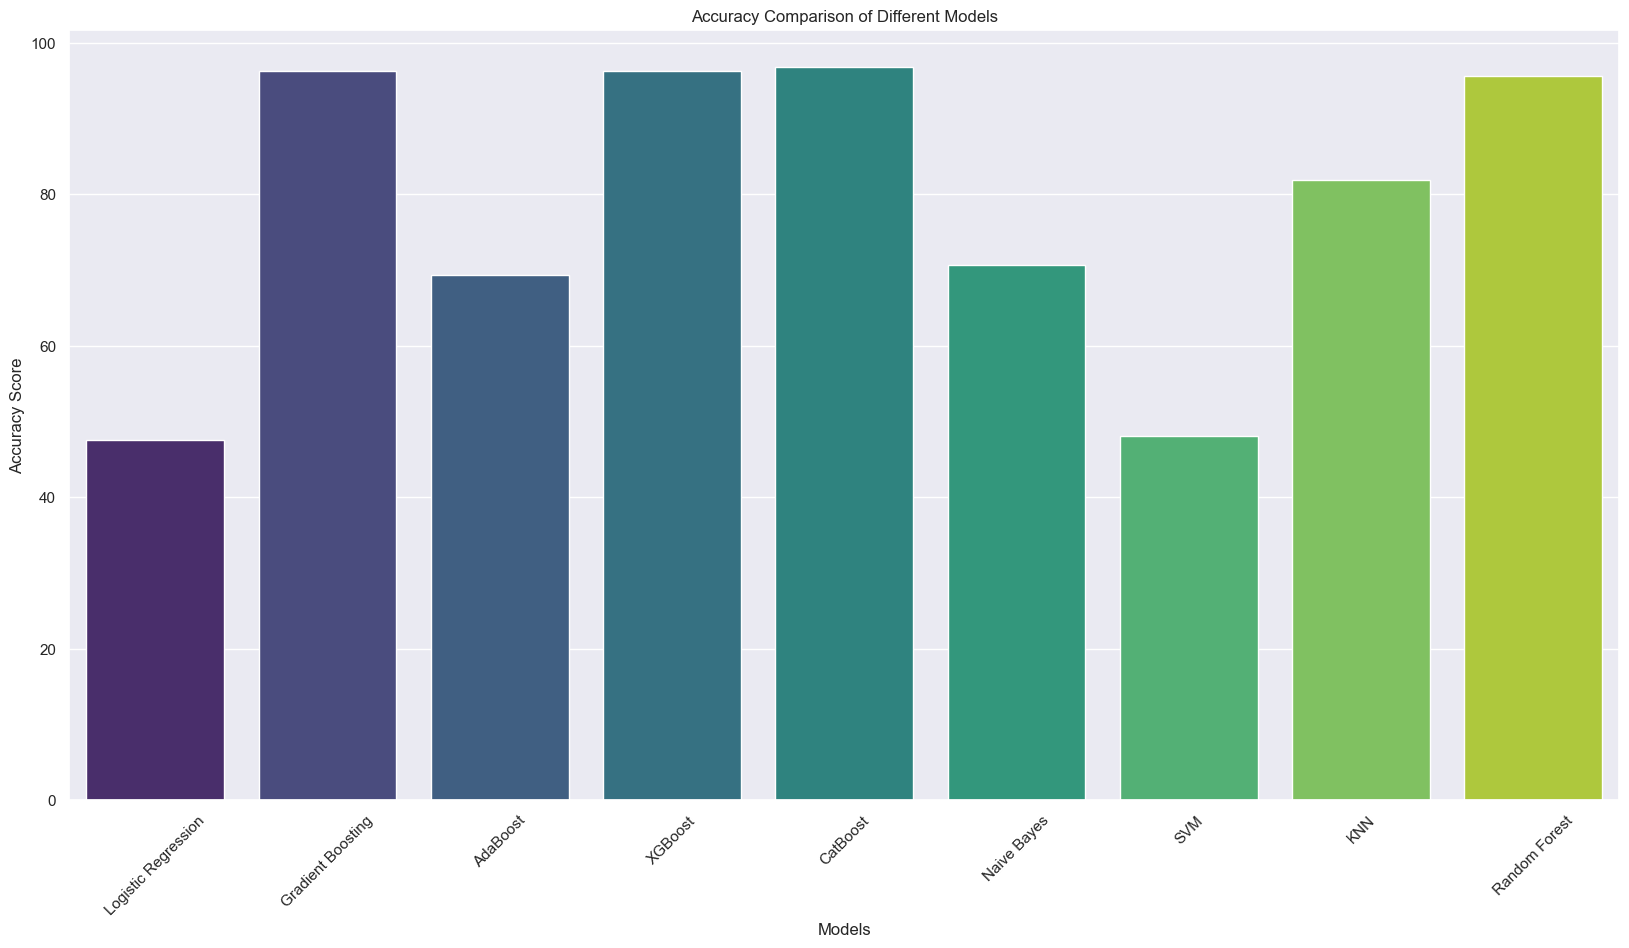

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Collect scores and model names
scores = [
    score_lr,  # Logistic Regression
    score_gb,  # Gradient Boosting
    score_ab,  # AdaBoost
    score_xgb, # XGBoost
    score_cb,  # CatBoost
    score_nb,  # Naive Bayes
    score_svm, # SVM
    score_knn, # KNN
    score_rf   # Random Forest
]

Models = [
    "Logistic Regression",
    "Gradient Boosting",
    "AdaBoost",
    "XGBoost",
    "CatBoost",
    "Naive Bayes",
    "SVM",
    "KNN",
    "Random Forest"
]

# Print accuracy for each model
for i in range(len(Models)):
    print(f"The accuracy score achieved using {Models[i]} is: {scores[i]} %")

# Plot the bar chart
sns.set(style="darkgrid", rc={'figure.figsize': (20, 10)})
plt.xlabel("Models", loc='center')
plt.ylabel("Accuracy Score")
sns.barplot(x=Models, y=scores, palette="viridis")
plt.title("Accuracy Comparison of Different Models")
plt.xticks(rotation=45)
plt.savefig("Model_Accuracy_Comparison.png")
plt.show()


In [47]:
import pickle
model=pickle.load(open("new.pkl","rb"))

## Fright

In [79]:

prediction = model.predict([[150,100,160]])[0]
print(prediction)

['Fright']


In [49]:
prediction = model.predict([[99,98,155]])[0]
print(prediction)

['Fright']


In [50]:
prediction = model.predict([[75,103,157]])[0]
print(prediction)

['Fright']


In [51]:
prediction = model.predict([[112,98,165]])[0]
print(prediction)

['Fright']


In [52]:
prediction = model.predict([[101,98,138]])[0]
print(prediction)

['Fright']


In [53]:
prediction = model.predict([[74,98,165]])[0]
print(prediction)

['Fright']


In [54]:
prediction = model.predict([[97,105,133]])[0]
print(prediction)

['Fright']


In [55]:
prediction = model.predict([[83,99,131]])[0]
print(prediction)

['Fright']


In [56]:
prediction = model.predict([[73,102,147]])[0]
print(prediction)

['Fright']


In [57]:
prediction = model.predict([[107,104,149]])[0]
print(prediction)

['Fright']


## Suspect

In [82]:
prediction = model.predict([[70,90,80]])[0]   # 
print(prediction)

['Normal']


In [59]:
prediction = model.predict([[76,97,95]])[0]    # 
print(prediction)

['Suspect']


In [60]:
prediction = model.predict([[63,93,120]])[0]  # 
print(prediction)

['Suspect']


In [61]:
prediction = model.predict([[46,94,80]])[0]  #
print(prediction)

['Suspect']


In [62]:
prediction = model.predict([[62,90,124]])[0]  #
print(prediction)

['Suspect']


In [63]:
prediction = model.predict([[55,94,105]])[0]  #
print(prediction)

['Suspect']


In [64]:
prediction = model.predict([[42,91,86]])[0] # 
print(prediction)

['Suspect']


In [65]:
prediction = model.predict([[51,93,81]])[0]  
print(prediction)

['Suspect']


In [66]:
prediction = model.predict([[57,90,129]])[0]
print(prediction)

['Suspect']


In [67]:
prediction = model.predict([[63,69,100]])[0]
print(prediction)

['Fright']


In [68]:
##Normal


In [69]:
prediction = model.predict([[63,69,100]])[0]
print(prediction)

['Fright']


In [70]:
prediction = model.predict([[63,69,100]])[0]
print(prediction)

['Fright']


In [71]:
prediction = model.predict([[63,69,100]])[0]
print(prediction)

['Fright']


In [72]:
prediction = model.predict([[63,69,100]])[0]
print(prediction)

['Fright']


In [73]:
prediction = model.predict([[63,69,100]])[0]
print(prediction)

['Fright']


In [74]:
prediction = model.predict([[63,69,100]])[0]
print(prediction)

['Fright']


In [75]:
prediction = model.predict([[63,69,100]])[0]
print(prediction)

['Fright']


In [76]:
prediction = model.predict([[63,69,100]])[0]
print(prediction)

['Fright']


In [77]:
prediction = model.predict([[63,69,100]])[0]
print(prediction)

['Fright']


In [78]:
prediction = model.predict([[63,69,100]])[0]
print(prediction)

['Fright']
